# Exploration of Loan Data from Prosper
## by Pavel Averin

## Preliminary Wrangling

This data set contains information about loans from Prosper. Prosper offers personal loans to individuals. Ahead, I will be exploring the dataset to find some interesting insights.

In [57]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skewnorm

%matplotlib inline

In [58]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('..\\prosperLoanData.csv')

In [59]:
pd.set_option("display.max_columns", None)

In [60]:
# high-level overview of data shape and composition
print(loans.shape)
loans.info()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

In [61]:
#Show all columns in the notebook
pd.set_option("display.max_columns", None)

In [62]:
#Display the first 10 rows
loans.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

### What is the structure of the dataset?

The dataset contains 113 937 rows and 81 columns. Numerical data prevails and includes 50 floats and 11 integers. The data contains null values, which will be investigated later. Here, I want to note that the dataset contains date variables. However, they are stored as strings. If we will use them in the exploration stage, they should be converted to datetime type of data.

### What is/are the main feature(s) of interest in the dataset?

The primary features of interest in the dataset will be a variable related to borrower interest rate (*BorrowerAPR* column).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The borrower annual percentage rate usually depends on may factors, such as borrower's credit score. I made a quick look up of features which might be relevant to the main feature of interest. The following variables may support my investigation:  
- Term  
- EmploymentStatus
- IsBorrowerHomeowner
- CreditScoreRangeLower
- CreditScoreRangeUpper
- DebtToIncomeRatio
- IncomeRange
- IncomeVerifiable
- StatedMonthlyIncome
- LoanOriginalAmount
- LoanOriginationQuarter

###### Drop the columns that are not variables of my interest

In [63]:
loans_expl = loans[['BorrowerAPR', 'Term', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower',
                     'CreditScoreRangeUpper', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
                     'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationQuarter' ]]

In [64]:
#Display the first 10 rows of new df
loans_expl.head(10)

,BorrowerAPR,Term,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter
0,0.16516,36,Self-employed,True,640.0,659.0,0.17,"$25,000-49,999",True,3083.333333,9425,Q3 2007
1,0.12016,36,Employed,False,680.0,699.0,0.18,"$50,000-74,999",True,6125.000000,10000,Q1 2014
2,0.28269,36,Not available,False,480.0,499.0,0.06,Not displayed,True,2083.333333,3001,Q1 2007
3,0.12528,36,Employed,True,800.0,819.0,0.15,"$25,000-49,999",True,2875.000000,10000,Q4 2012
4,0.24614,36,Employed,True,680.0,699.0,0.26,"$100,000+",True,9583.333333,15000,Q3 2013
5,0.15425,60,Employed,True,740.0,759.0,0.36,"$100,000+",True,8333.333333,15000,Q4 2013
6,0.31032,36,Employed,False,680.0,699.0,0.27,"$25,000-49,999",True,2083.333333,3000,Q2 2013
7,0.23939,36,Employed,False,700.0,719.0,0.24,"$25,000-49,999",True,3355.750000,10000,Q2 2013
8,0.07620,36,Employed,True,820.0,839.0,0.25,"$25,000-49,999",True,3333.333333,10000,Q4 2013
9,0.07620,36,Employed,True,820.0,839.0,0.25,"$25,000-49,999",True,3333.333333,10000,Q4 2013


## Some Data Wrangling to prepare the dataset for explorational analysis 

In [65]:
#Create a copy of dataset
loans_clean = loans_expl

In [66]:
#Display characteristics of variables
loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BorrowerAPR             113912 non-null  float64
 1   Term                    113937 non-null  int64  
 2   EmploymentStatus        111682 non-null  object 
 3   IsBorrowerHomeowner     113937 non-null  bool   
 4   CreditScoreRangeLower   113346 non-null  float64
 5   CreditScoreRangeUpper   113346 non-null  float64
 6   DebtToIncomeRatio       105383 non-null  float64
 7   IncomeRange             113937 non-null  object 
 8   IncomeVerifiable        113937 non-null  bool   
 9   StatedMonthlyIncome     113937 non-null  float64
 10  LoanOriginalAmount      113937 non-null  int64  
 11  LoanOriginationQuarter  113937 non-null  object 
dtypes: bool(2), float64(5), int64(2), object(3)
memory usage: 8.9+ MB


Some features I noticed for cleaning:  
- *BorrowerAPR* contains null values
- *EmploymentStatus* contains null values
- *CreditScoreRangeLower* and *CreditScoreRangeUpper* I would replace these two variables with one categorical variable with following values: *VeryPoor, Fair, Good, VeryGood and Escellent* according to conventional score ranges names.
- *DebtToIncomRatio* - contains null values
- *IncomeRange* - string instead of categorical
- *LoanOriginalQuarter* - string instead of categorical.

In [67]:
#Drop rows with NaN values from BorrowerAPR column
loans_clean = loans_clean.dropna(subset=['BorrowerAPR','EmploymentStatus', 'CreditScoreRangeLower', 
                           'IncomeRange', 'DebtToIncomeRatio'])

###### Credit score 
There are two main agencies which provide credit scores: FICO and Vantage.  


FICO ranges:

| Category | Lower Limit | Upper Limit |
| --- | --- | --- |
| Very Poor | 300 | 579 |
| Fair | 580 | 669 |
| Good | 670 | 739 |
| Very Good | 740 | 799 |
| Very Poor | 800 | 850 |  


Vantage ranges:

| Category | Lower Limit | Upper Limit |
| --- | --- | --- |
| Very Poor | 300 | 499 |
| Fair | 500 | 600 |
| Good | 601 | 660 |
| Very Good | 661 | 780 |
| Very Poor | 781 | 850 |

I add new feature to the dataset so the credit score will be a categorical variable. Let's assume that Prosper is using FICO credit score ranges and upper credit score of a borrower should be used

In [68]:
# create a list of conditions
conditions = [
    (loans_clean['CreditScoreRangeUpper'] < 580),
    (loans_clean['CreditScoreRangeUpper'] >= 580 ) & (loans_clean['CreditScoreRangeUpper'] < 670),
    (loans_clean['CreditScoreRangeUpper'] >= 670) & (loans_clean['CreditScoreRangeUpper'] < 740),
    (loans_clean['CreditScoreRangeUpper'] >= 740) & (loans_clean['CreditScoreRangeUpper'] < 800),
    (loans_clean['CreditScoreRangeUpper'] >=800)
    ]

# create a list of the values we want to assign for each condition
values = ['Very Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# create a new column and use np.select to assign values to it using our lists as arguments
loans_clean['CreditScore'] = np.select(conditions, values)

<ipython-input-68-89255e40c62d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_clean['CreditScore'] = np.select(conditions, values)


In [69]:
loans_clean.head()

,BorrowerAPR,Term,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,CreditScore
0,0.16516,36,Self-employed,True,640.0,659.0,0.17,"$25,000-49,999",True,3083.333333,9425,Q3 2007,Fair
1,0.12016,36,Employed,False,680.0,699.0,0.18,"$50,000-74,999",True,6125.000000,10000,Q1 2014,Good
2,0.28269,36,Not available,False,480.0,499.0,0.06,Not displayed,True,2083.333333,3001,Q1 2007,Very Poor
3,0.12528,36,Employed,True,800.0,819.0,0.15,"$25,000-49,999",True,2875.000000,10000,Q4 2012,Excellent
4,0.24614,36,Employed,True,680.0,699.0,0.26,"$100,000+",True,9583.333333,15000,Q3 2013,Good


In [70]:
loans_clean.LoanOriginationQuarter.value_counts()

Q4 2013    13509
Q1 2014    11267
Q3 2013     8740
Q2 2013     6642
Q3 2012     5091
Q2 2012     4490
Q2 2008     4058
Q4 2012     4043
Q1 2012     3855
Q4 2011     3405
Q1 2013     3288
Q3 2008     3139
Q2 2007     3098
Q1 2008     2982
Q1 2007     2974
Q3 2011     2742
Q3 2007     2582
Q4 2007     2491
Q4 2006     2238
Q2 2011     2202
Q1 2011     1575
Q3 2006     1437
Q4 2010     1419
Q2 2010     1345
Q4 2009     1292
Q3 2010     1127
Q1 2010     1101
Q3 2009      544
Q4 2008      465
Q2 2009       13
Q2 2006        1
Name: LoanOriginationQuarter, dtype: int64

In [72]:
#Convert strings in columns IncomeRange, CreditScore and LoanOriginationQuarter to categorical type
income_list = ['$1-24,999', '$25,000-49,999', '$50,000-74,999',
               '$75,000-99,999', '$100,000+']
v_income = pd.api.types.CategoricalDtype(ordered = True, categories = income_list)
loans_clean.loc[:, 'IncomeRange'] = loans_clean.loc[:, 'IncomeRange'].astype(v_income)
score_list = ['Very Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
v_score = pd.api.types.CategoricalDtype(ordered = True, categories = score_list)
loans_clean.loc[:, 'CreditScore'] = loans_clean.loc[:, 'CreditScore'].astype(v_score)
start_list = ['Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 
              'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008', 'Q1 2009', 'Q2 2009', 'Q3 2009', 'Q4 2009',
              'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011',
              'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012', 'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 
              'Q1 2014']
v_start = pd.api.types.CategoricalDtype(ordered = True, categories = start_list)
loans_clean.loc[:,'LoanOriginationQuarter'] = loans_clean.loc[:, 'LoanOriginationQuarter'].astype(v_start)

In [73]:
#Check if the desired columns are converted to categorical type
loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103155 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   BorrowerAPR             103155 non-null  float64 
 1   Term                    103155 non-null  int64   
 2   EmploymentStatus        103155 non-null  object  
 3   IsBorrowerHomeowner     103155 non-null  bool    
 4   CreditScoreRangeLower   103155 non-null  float64 
 5   CreditScoreRangeUpper   103155 non-null  float64 
 6   DebtToIncomeRatio       103155 non-null  float64 
 7   IncomeRange             97688 non-null   category
 8   IncomeVerifiable        103155 non-null  bool    
 9   StatedMonthlyIncome     103155 non-null  float64 
 10  LoanOriginalAmount      103155 non-null  int64   
 11  LoanOriginationQuarter  103155 non-null  category
 12  CreditScore             103155 non-null  category
dtypes: bool(2), category(3), float64(5), int64(2), object(1)
me

In [74]:
#extract clean data in csv format for elplanatory analysis
#loans_clean.to_csv('..\\..\\prosperLoanData_clean.csv', index = False)

## Univariate Exploration

In [75]:
#Set up styles for the graphs globally
sb.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=13)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('font', size=1)  

In [76]:
#Find min and max values for bins
loans_clean.BorrowerAPR.describe()

count    103155.000000
mean          0.216682
std           0.079613
min           0.006530
25%           0.154280
50%           0.207350
75%           0.277760
max           0.423950
Name: BorrowerAPR, dtype: float64

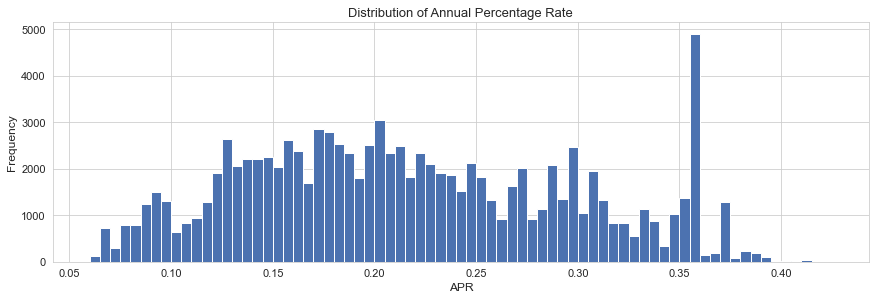

In [56]:
#Create Histogram
plt.figure(figsize=(12,4), tight_layout=True)
base_color=sb.color_palette('deep')
bins = np.arange(0.06, 0.42 + 0.01, 0.005)
plt.hist(data = loans_clean, x = 'BorrowerAPR', bins = bins, color = base_color[0]);
plt.title('Distribution of Annual Percentage Rate');
plt.ylabel('Frequency')
plt.xlabel('APR');

C:\Users\averi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


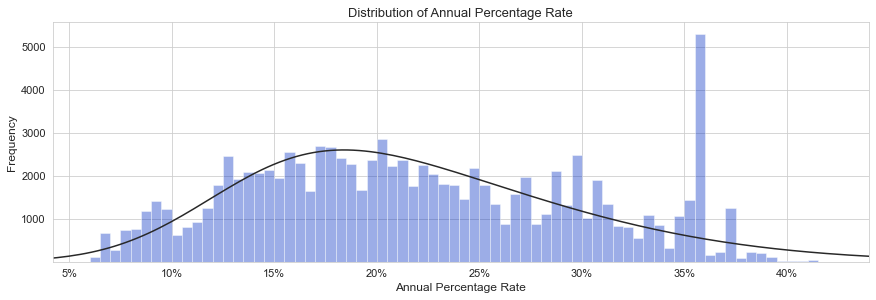

In [79]:
#Create Histogram
plt.figure(figsize=(12,4), tight_layout=True)
bins = np.arange(0.06, 0.42 + 0.01, 0.005)
sb.distplot(loans['BorrowerAPR'], bins = bins, color = '#0832C3', kde = False, fit = skewnorm)
xticks = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40]
xlabels = ['5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%']
yticks = [2, 4, 6, 8, 10]
ylabels = [1000, 2000, 3000, 4000, 5000]
plt.title('Distribution of Annual Percentage Rate');
plt.ylabel('Frequency')
plt.xlabel('Annual Percentage Rate');
plt.xlim(0.042,0.44)
plt.yticks(yticks, ylabels);
plt.xticks(xticks, xlabels);

The distribution of Borrower's annual percentage rate is multimodal slightly skewed to the right. There is a peak between 35.5% and 36%. 4904 observations fall in this range, which makes 4.75% of all entries.

In [80]:
#Find min and max values for bins
loans_clean.LoanOriginalAmount.describe()

count    103155.000000
mean       8527.461451
std        6348.107589
min        1000.000000
25%        4000.000000
50%        6600.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

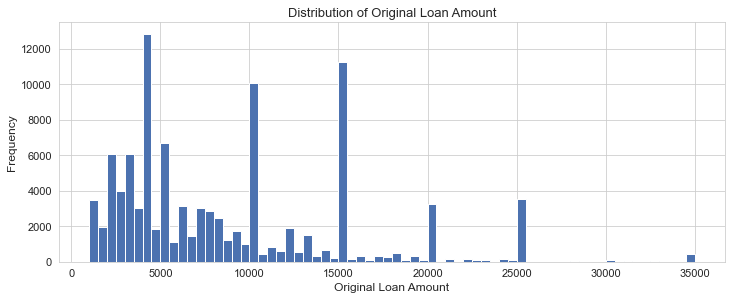

In [81]:
#Create a histogram
sb.set_style('whitegrid')
plt.figure(figsize=(10,4), tight_layout=True)
bins = np.arange(1000, 35000 +100, 500)
plt.hist(data = loans_clean, x = 'LoanOriginalAmount', bins = bins, color = base_color[0]);
plt.title('Distribution of Original Loan Amount')
plt.ylabel('Frequency')
plt.xlabel('Original Loan Amount');

There are very large spikes in frequency at USD 4000, USD 10000, USD 15000. These probably represent standard loan sizes with Prosper.

Now, I will look at distribution of Debt to Income Ratio

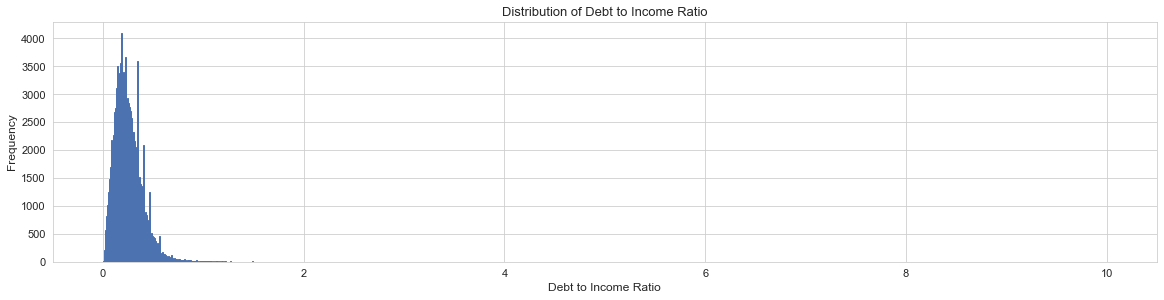

In [82]:
#Start with a standard-scaled plot
plt.figure(figsize=(16,4), tight_layout=True)
bins = np.arange(0, 10 + 0.01, 0.01)
plt.hist(data = loans_clean, x = 'DebtToIncomeRatio', bins = bins, edgecolor = base_color[0], color = base_color[0]);
plt.title('Distribution of Debt to Income Ratio')
plt.ylabel('Frequency')
plt.xlabel('Debt to Income Ratio');

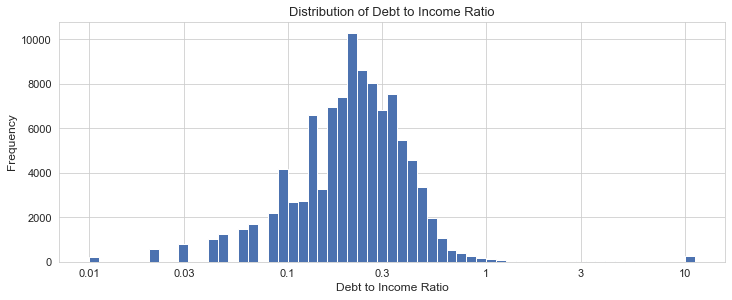

In [83]:
#There's a long tail in the distribution, so let's put it on a log scale instead
plt.figure(figsize=(10,4), tight_layout=True)
bins = 10 ** np.arange(-2, 1 + 0.1, 0.05)
plt.hist(data = loans_clean, x = 'DebtToIncomeRatio', bins = bins, color = base_color[0]);
ticks = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
labels = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
plt.xscale('log')
plt.title('Distribution of Debt to Income Ratio')
plt.ylabel('Frequency')
plt.xlabel('Debt to Income Ratio');
plt.xticks(ticks, labels);

Debt To Income Ratio has a long-tailed distribution, with a high frequency on the low Debt To Income Ratio end, and few on the high Debt To Income Ratio end. When plotted on a log-scale, the distribution looks roughly unimodal, with one peak between 0.1 and 0.4.

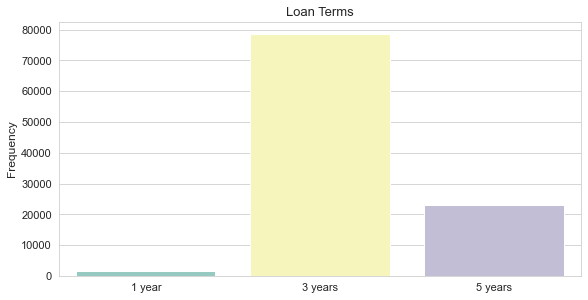

In [84]:
#Create a bar plot
plt.figure(figsize=(8,4), tight_layout=True)
sb.countplot(data = loans_clean, x = 'Term', palette = 'Set3');
ticks = [0, 1, 2]
labels = ['1 year', '3 years', '5 years']
plt.title('Loan Terms');
plt.xlabel('');
plt.xticks(ticks, labels);
plt.ylabel('Frequency');

The most frequent term of a loan is 3 years.  
Next, I will look at employment status of borrowers.

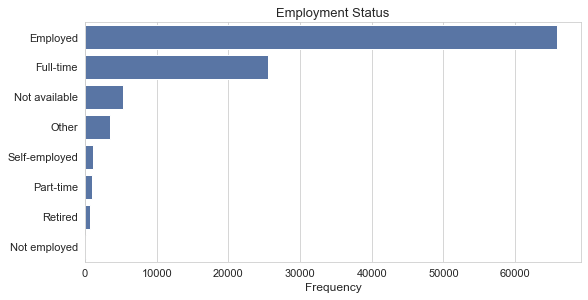

In [85]:
#Create bar plot
plt.figure(figsize=(8,4), tight_layout=True)
base_color = sb.color_palette('deep')
order = loans_clean.EmploymentStatus.value_counts().index
sb.countplot(data = loans_clean, y = 'EmploymentStatus', color = base_color[0], order = order);
plt.title('Employment Status')
plt.xlabel('Frequency')
plt.ylabel('');

The bar plot above shows that almost all the borrowers are employed. The categories are not precise, because both part-time and full-time employees may fall into Employed category. Further, I will check the frequency of those borrowers who are home owners.

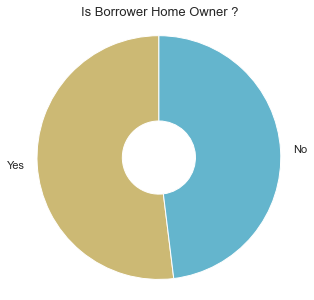

In [86]:
#Create a pie chart
plt.figure(figsize=(8,4), tight_layout=True)
plt.title('Is Borrower Home Owner ?')
plt.pie(loans_clean.IsBorrowerHomeowner.value_counts(), startangle = 90, colors = base_color[8:10], 
        labels = ['Yes', 'No'], wedgeprops = {'width' : 0.7});
plt.axis('square');

The pie chart above indicates that alomost half of the borrowers are home owners.

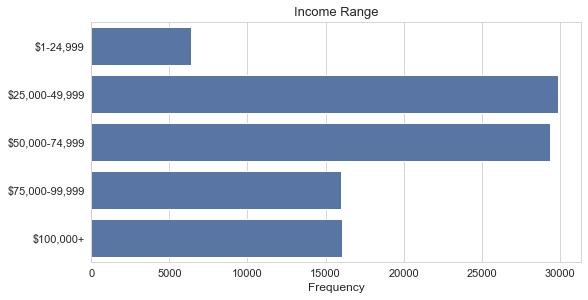

In [87]:
#Create a bar chart
plt.figure(figsize=(8,4), tight_layout=True)
sb.countplot(data = loans_clean, y = 'IncomeRange', color = base_color[0]);
plt.title('Income Range');
plt.ylabel('');
plt.xlabel('Frequency');

I rotated the chart 90 degrees to make the variable names readable. From this plot I see that the most frequent income range is \\$25 000 - \\$49 999 and \\$50 000 - \\$74 999

In [88]:
#loans_clean = loans_clean.query('IncomeRange != "Not displayed"')
#loans_clean['IncomeRange'].replace({'Not employed': '$0'}, inplace = True)

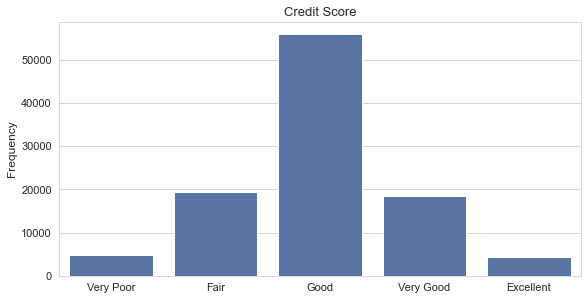

In [89]:
#Create a bar chart
plt.figure(figsize=(8,4), tight_layout=True)
sb.countplot(data = loans_clean, x = 'CreditScore', color = base_color[0]);
plt.title('Credit Score')
plt.ylabel('Frequency')
plt.xlabel('');

The majority of the borrowers have Good Credit Score

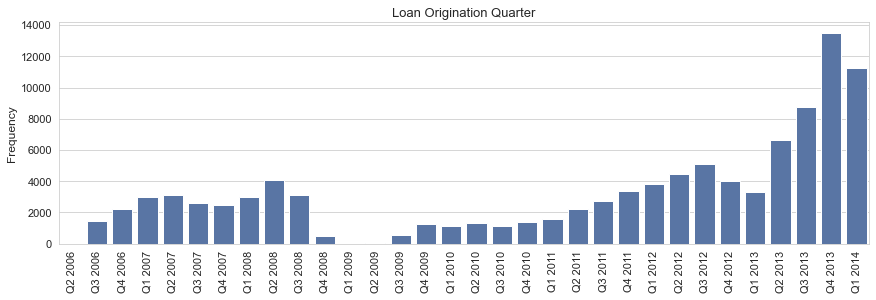

In [90]:
#Create a bar chart
plt.figure(figsize=(12,4), tight_layout=True)
sb.countplot(data = loans_clean, x = 'LoanOriginationQuarter', color = base_color[0]);
plt.xticks(rotation = 90);
plt.title('Loan Origination Quarter')
plt.ylabel('Frequency')
plt.xlabel('');

The distribution has a few slight peaks. The first peak is in 2008, the second is in 2012 and highest peak is in 2013. The data from 2009 year is missing. This may be because the dataset is not complete or because no laons were issued during that period.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Overall, the Annual Percentage Rate variable took a multimodal distribution. Values range from 0.5% to 40%. At a point of around 35% the graph shows the most frequent value.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

All distributions are more or less usual. The majority of borrowers have good credit rating and average income from 25000 to 75000.

## Bivariate Exploration

First I will be looking at correlation of two main quantitative variables: *APR* and *OriginalLoanAmount*. I expect that if the loan amount is higher, then APR should be higher, ie positive correlation. 

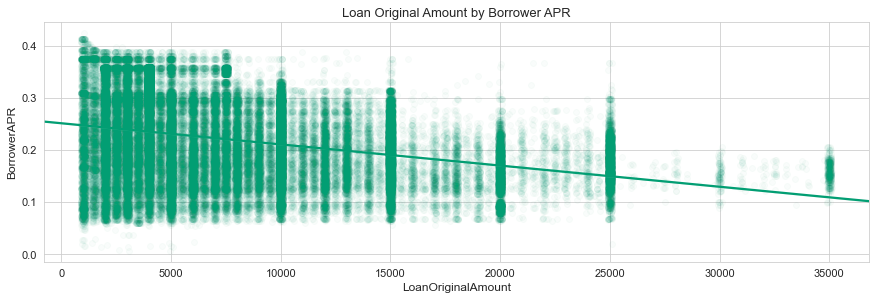

In [91]:
#Create a scatter plot
plt.figure(figsize=(12,4), tight_layout=True)
base_color = sb.color_palette('colorblind')
sb.regplot(data = loans_clean, y = 'BorrowerAPR', x = 'LoanOriginalAmount', truncate = False, 
           scatter_kws = {'alpha': 1/40}, color = base_color[2], x_jitter = 100);
plt.title('Loan Original Amount by Borrower APR');

The scatter plot shows unexpected negative relationship. It means that if the loan amount is higher, the APR is lower.

Next, I will observe relationship between Borrower APR and Debt to Income Ratio

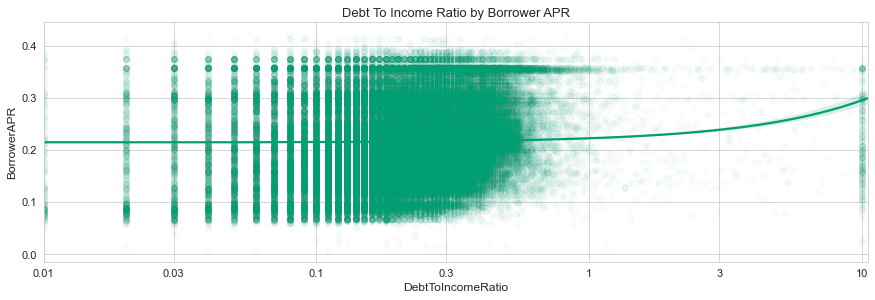

In [92]:
#Create scatterplot
plt.figure(figsize=(12,4), tight_layout=True)
base_color = sb.color_palette('colorblind')
ticks = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
labels = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
sb.regplot(data = loans_clean, y = 'BorrowerAPR', x = 'DebtToIncomeRatio', truncate = False, 
           scatter_kws = {'alpha': 1/40}, color = base_color[2]);
plt.xscale('log')
plt.title('Debt To Income Ratio by Borrower APR');
plt.xticks(ticks, labels);

The scatter plot shows an interesting thing: At the lower end of Debt To Income Ratio the line of best fit stays constant at a level of about 20%, however, starting from Debt To Income Ratio at 100% APR slowly increase.

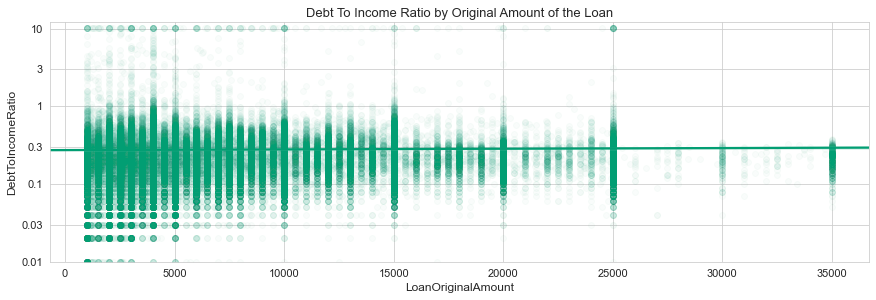

In [93]:
#Create a scatter plot
plt.figure(figsize=(12,4), tight_layout=True)
base_color = sb.color_palette('colorblind')
ticks = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
labels = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
sb.regplot(data = loans_clean, y = 'DebtToIncomeRatio', x = 'LoanOriginalAmount', truncate = False, 
           scatter_kws = {'alpha': 1/40}, color = base_color[2]);
plt.yscale('log')
plt.title('Debt To Income Ratio by Original Amount of the Loan');
plt.yticks(ticks, labels);

The graph above shows no correlation between Debt to Income Ratio and Original Amount of the Loan

Now, I will have a look at how Borrower APR and Loan Original Amount correlate with categorical variables.

In [94]:
#Display column names
loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103155 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   BorrowerAPR             103155 non-null  float64 
 1   Term                    103155 non-null  int64   
 2   EmploymentStatus        103155 non-null  object  
 3   IsBorrowerHomeowner     103155 non-null  bool    
 4   CreditScoreRangeLower   103155 non-null  float64 
 5   CreditScoreRangeUpper   103155 non-null  float64 
 6   DebtToIncomeRatio       103155 non-null  float64 
 7   IncomeRange             97688 non-null   category
 8   IncomeVerifiable        103155 non-null  bool    
 9   StatedMonthlyIncome     103155 non-null  float64 
 10  LoanOriginalAmount      103155 non-null  int64   
 11  LoanOriginationQuarter  103155 non-null  category
 12  CreditScore             103155 non-null  category
dtypes: bool(2), category(3), float64(5), int64(2), object(1)
me

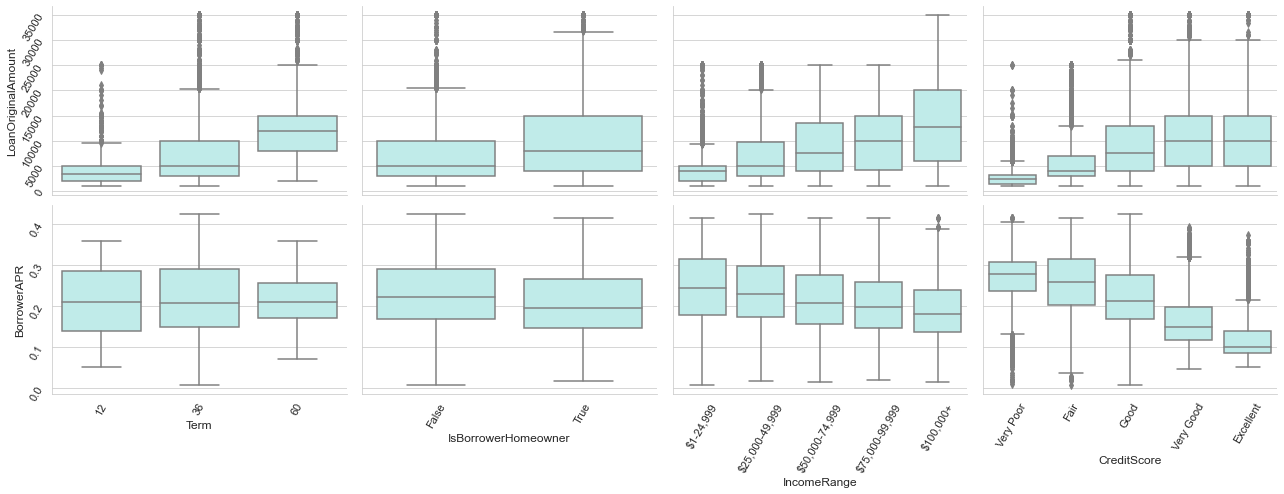

In [95]:
#Create box plots
base_color = sb.color_palette('pastel')
numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR']
categoric_vars = ['Term','IsBorrowerHomeowner','IncomeRange','CreditScore']
g = sb.PairGrid(data = loans_clean, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(sb.boxplot, color = base_color[9]);
for ax in g.axes.flatten():
    ax.tick_params(rotation = 60);

Above I am lookin at correlation between Original Loan Amount and all categorical variables (Term, IsBorrowerHomeowner, IncomeRange and CreditScore)  
In relation to Loan Original Amount, the following insights were found:
- Longer term loans are associated with higher loan amount.
- Home owners borrow higher amounts
- Borrowers with higher income borrow higher amounts
- Borrowers with higher credit score borrow higher amounts  
In relation to Borrower APR, the following insights were spoted:
- Median of APR differs insignificantly by loan term
- If Borrower is a home owner, median of APR is lower compared to the borrower not home owner
- I expect decrease in borrower APR is associated with increase in range of income.
- APR decreases when borrower credit rating increases

All the above observations match the expection and common logic

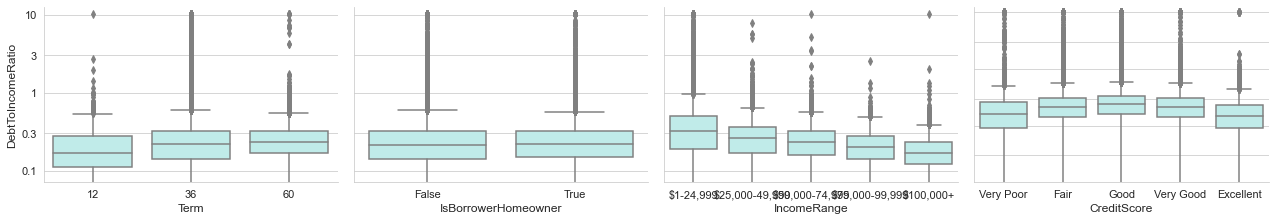

In [96]:
#Create a grid of box plots
base_color = sb.color_palette('pastel')
categoric_vars = ['Term','IsBorrowerHomeowner','IncomeRange','CreditScore']
g = sb.PairGrid(data = loans_clean, y_vars = 'DebtToIncomeRatio', x_vars = categoric_vars,
                height = 3, aspect = 1.5)
ticks = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
labels = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
plt.yscale('log')
g.map(sb.boxplot, color = base_color[9]);
plt.yticks(ticks, labels);

Here, I do not see any significant relationship.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

During bivariate explortation of the dataset several observation were made. One of the most significant relations is correlation between Loan Amount and APR. When loan amount increases APR decreases. I assumed the opposite. Further analysis leads to the observation that the borrower's credit score plays an important role in a percentage of APR. The box plot explicitly shows that median of APR decreases when credit rating of a borrower increases. For example, borrowers with very poor credit rating are entitled to median of 30% APR while borrowers with excellent credit rating are entitled to median of 10%. This will be analysed further in the multivariate exploration stage.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I observed some interesting relationships between other features. In my opinion the most significant insight is that borrowers with lower income borrow less and borrowers with higher income borrow more. This may be explained by the volume of disposable income of borrowers.

## Multivariate Exploration

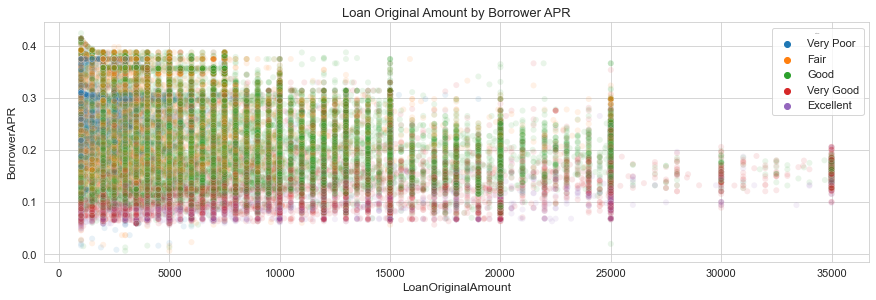

In [97]:
#Create scatter plot
plt.figure(figsize=(12,4), tight_layout=True)
base_color = sb.color_palette('colorblind')
sb.scatterplot(data = loans_clean, y = 'BorrowerAPR', x = 'LoanOriginalAmount', alpha = 1/10, 
            color = base_color[2], hue = 'CreditScore', x_jitter = 100);
plt.title('Loan Original Amount by Borrower APR');

The graph above shows relationship between three variables: Borrower APR, Loan Original Amount and Credit Score. The majority of dots that are representing Very Good Credit score are concentrated in lower part of the graph.

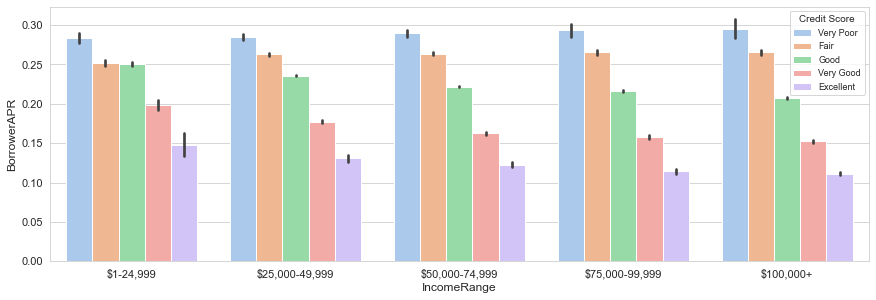

In [98]:
#Create a clustered bar chart
plt.figure(figsize=(12,4), tight_layout=True)
sb.barplot(data = loans_clean, x = 'IncomeRange', y= 'BorrowerAPR', hue='CreditScore', palette='pastel');
plt.legend(title='Credit Score', title_fontsize='10', loc='upper right', prop={'size': 9});

This graph shows relationships between one numeric variable and two categorical. APR for Very Poor and Fair credit score does not decrease when income range increases. Moreover, APR for borrowers with very poor credit score slightly increases. However, if I look at Good, Very Good and Excellent credit scores individually, I note that the higher income range, the lower APR.

C:\Users\averi\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\averi\anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


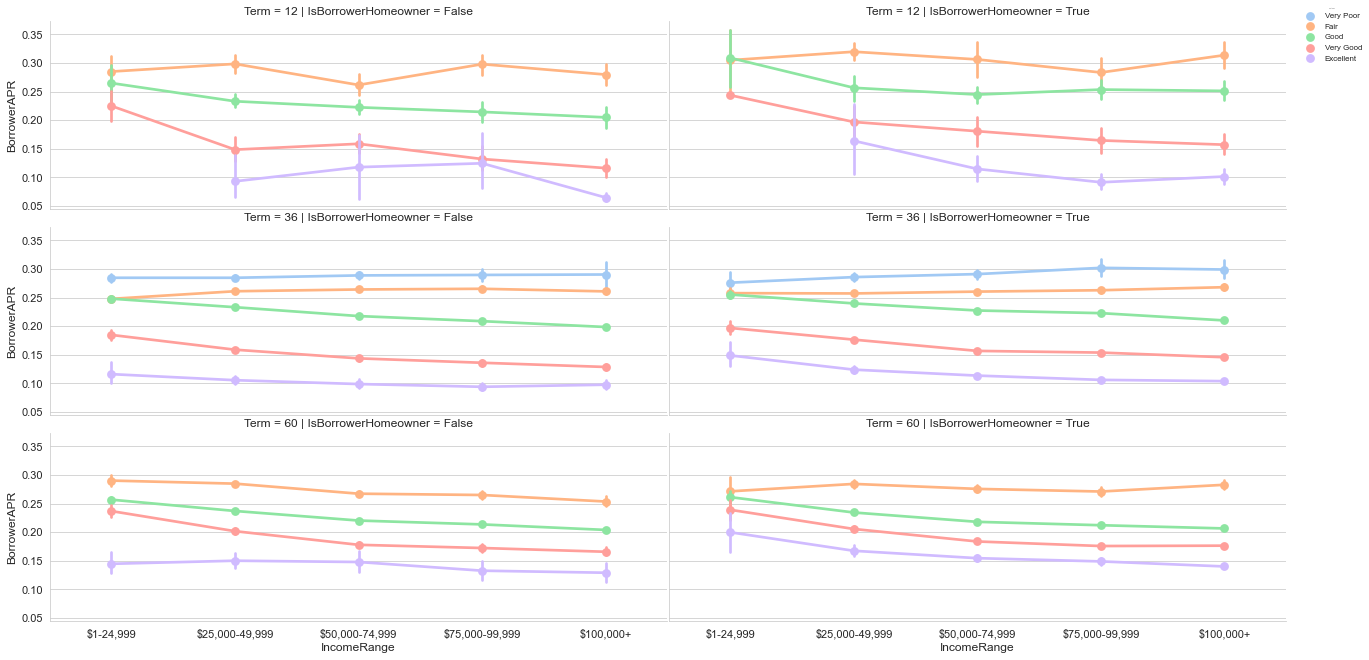

In [99]:
#Create a FacetGrit where many variables are observed separately.
g = sb.FacetGrid(data = loans_clean, col = 'IsBorrowerHomeowner', row = 'Term', aspect = 3, legend_out = True)
g.map(sb.pointplot,'IncomeRange','BorrowerAPR', 'CreditScore', palette='pastel')
g.add_legend(title='Credit Score', loc='upper right', prop={'size': 8});

The above pointplots show relationships between multiple variables: Borrower APR, Income Range, Is borrower home owner, credit score and term of the loan. This set of plots confirm that the credit score plays the most significant role in determination of APR. In all plots order is consistent with categories of Credit Score, i.e. there are only a few points which intercept with one another and this happens only on low income range end.

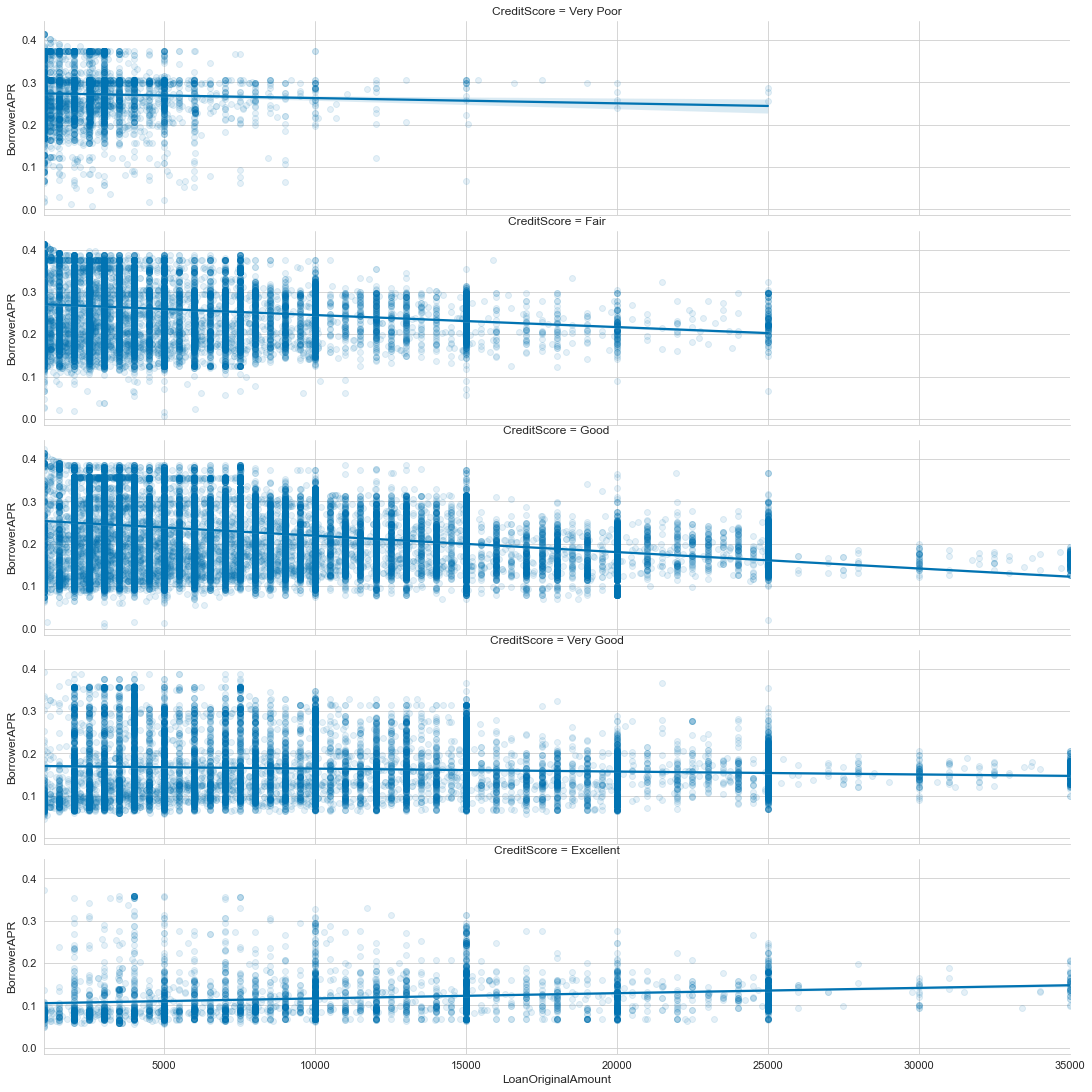

In [100]:
#Create a scatter plot for each value in the Credit Score variable
g = sb.FacetGrid(data = loans_clean, col = 'CreditScore', height = 3, aspect = 5, legend_out = True, col_wrap = 1)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws = {'alpha': 1/10}, 
            color = base_color[0]);


The most significant correlation is where credit score is Very Good. Probably because the frequency of "Very Good" value in Credit Score column prevail. Interestingly, where credit score is Excellent, APR increases when Original amount of the loan increases.

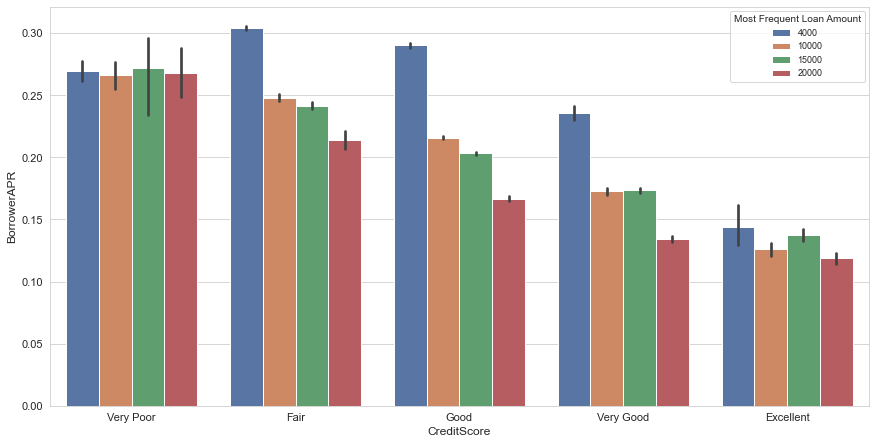

In [101]:
#Create a bar chart with APR by Credit Score by the most frequent amount
plt.figure(figsize=(12,6), tight_layout=True)
sb.barplot(data = loans_clean.query('LoanOriginalAmount == 4000 | LoanOriginalAmount == 10000 | LoanOriginalAmount == 15000 | LoanOriginalAmount == 20000'),
           x = 'CreditScore', y= 'BorrowerAPR', hue = 'LoanOriginalAmount', palette = 'deep');
plt.legend(title='Most Frequent Loan Amount', title_fontsize='10', loc='upper right', prop={'size': 9});

Here I dicided to observe the most frequent loan amounts by credit score. Interestingly that for borrowers with very poor credit score, loan amount does not affect the APR. Further, starting with Fair credit score the graph supports the idea that for higher amount, lower APR applies. However, this graph represents the most frequent amounts only. Now, lets look at full dataset filtered by Good Credit Score and Excellent credit score to see if the above observation  based on isolated amounts will be supported by all original amounts of the loan.

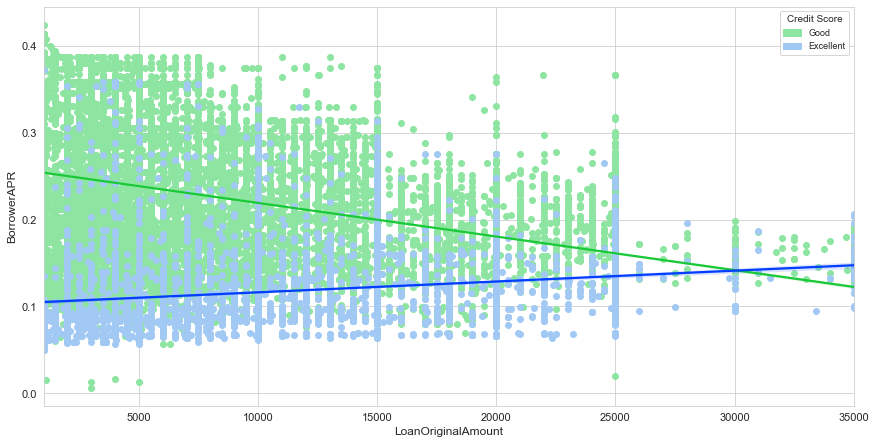

In [103]:
#Create two scatter plots in one figure to make the comparison more visible
import matplotlib.patches as patch

plt.figure(figsize=(12,6), tight_layout=True)
base_color = sb.color_palette('pastel')
line_color = sb.color_palette('bright')
sb.regplot(data = loans_clean.query('CreditScore == "Good"'), x = 'LoanOriginalAmount', y = 'BorrowerAPR',
           scatter_kws = {'alpha': 1/1}, line_kws={"color": line_color[2]}, color = base_color[2])
sb.regplot(data = loans_clean.query('CreditScore == "Excellent"'), x = 'LoanOriginalAmount', y = 'BorrowerAPR',
           scatter_kws = {'alpha': 1/1}, line_kws={"color": line_color[0]}, color = base_color[0]);
green = patch.Patch(color=base_color[2], label='Good')
blue = patch.Patch(color=base_color[0], label='Excellent')
plt.legend(handles=[green, blue], title='Credit Score', title_fontsize='10', loc='upper right', prop={'size': 9});

Earlier in this report I noted that BorrowerAPR respond better where credit score is Good and for excellent credit score, there is a positive correlation between BorrowerAPR and LoanOriginalAmount. Now I make two scatterplots, so the first one will be covered by the second. Here I see that where credit score is Good the APR decreases and where the credit score is Excellent, the APR increases.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration supported the idea that APR depends on variable choosen. Credit Score play the most significant role when predicting APR. The pointplot where I observed relationships between all the variables shows the significance of this feature explicitly.

### Were there any interesting or surprising interactions between features?

In general, the dataset shows that where the loan amount is higher, APR is lower, i.e. negative correlation. However, this is not the case in respect of Excellent credit score, which shows positive correlation.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!